In [1]:
import pandas as pd
import numpy as np

In [2]:
# fazendo a leitura da base enriquecida, trabalhada na etapa anterior
df = pd.read_csv("base_enriquecida_codigos")

In [3]:
df

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,4.108924,4.154725
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,4.108924,4.154725
...,...,...,...,...,...,...,...,...,...,...,...,...
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713
1764429,2019-08,30043918,10,767,SP,4,817600,225,225,1216801,4.019382,3.778713
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713
1764431,2019-08,84123900,11,764,PA,4,817600,1,83,7641,4.019382,3.778713


In [4]:
# filtrando apenas os registros em que a medida estatística não é "quilograma"
df1=df[df["CO_UNID"]!=10]

In [5]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,4.108924,4.154725
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,4.108924,4.154725
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,4.108924,4.154725
...,...,...,...,...,...,...,...,...,...,...,...,...
1764427,2019-08,84243010,11,249,SP,4,817600,22,56,24875,4.019382,3.778713
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713
1764431,2019-08,84123900,11,764,PA,4,817600,1,83,7641,4.019382,3.778713


###### Checando códigos NCM recorrentes

In [6]:
# checando quais os códigos NCM mais recorrentes, tendo em vista que não foi possível "dummizar" todos em teste anteriormente realizado
g1=df1.groupby(['CO_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_NCM,contagem
1915,85365090,8873
1926,85369090,7697
2107,87082999,5172
1470,84818099,4736
1493,84834090,4588
...,...,...
1209,84581191,1
108,37013010,1
1393,84751000,1
235,44081091,1


In [7]:
g1["% CO_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [8]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [9]:
g2["% CO_NCM ACUMUL"]=g2["% CO_NCM"].cumsum()

In [10]:
g2.head()

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
1915,85365090,8873,0.011297,0.011297
1926,85369090,7697,0.009799,0.021096
2107,87082999,5172,0.006585,0.027681
1470,84818099,4736,0.006030,0.033710
1493,84834090,4588,0.005841,0.039551


In [11]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_NCM ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restingem a 1211 códigos NCM dentre os 2604.

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
1915,85365090,8873,0.011297,0.011297
1926,85369090,7697,0.009799,0.021096
2107,87082999,5172,0.006585,0.027681
1470,84818099,4736,0.006030,0.033710
1493,84834090,4588,0.005841,0.039551
...,...,...,...,...
1780,85234190,90,0.000115,0.949479
2481,91081110,90,0.000115,0.949594
1897,85353018,90,0.000115,0.949709
880,84233090,90,0.000115,0.949823


In [12]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_NCM ACUMUL"]>0.95]
g4

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
1405,84771099,90,0.000115,0.950052
864,84221900,90,0.000115,0.950167
456,62033900,90,0.000115,0.950281
660,84051000,90,0.000115,0.950396
1163,84521000,89,0.000113,0.950509
...,...,...,...,...
1209,84581191,1,0.000001,0.999995
108,37013010,1,0.000001,0.999996
1393,84751000,1,0.000001,0.999997
235,44081091,1,0.000001,0.999999


In [13]:
# obtendo os 5% códigos NCM menos recorrentes, para agrupar como "outros" no df1 original
idx=g4["CO_NCM"]

In [14]:
mask=df1['CO_NCM'].isin(idx)
mask

0          False
1          False
6          False
9          False
10         False
           ...  
1764427    False
1764428    False
1764430    False
1764431    False
1764432    False
Name: CO_NCM, Length: 785462, dtype: bool

In [15]:
df1["CO_NCM_final"]=df1["CO_NCM"]

<ipython-input-15-e6965bd59fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_NCM_final"]=df1["CO_NCM"]


In [16]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_NCM_final para preservar a original CO_NCM)
df1.loc[mask, "CO_NCM_final"] = 99999999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [17]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725,85044021
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725,85183000
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,4.108924,4.154725,85042100
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,4.108924,4.154725,84719012
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,4.108924,4.154725,84798210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764427,2019-08,84243010,11,249,SP,4,817600,22,56,24875,4.019382,3.778713,84243010
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713,85365090
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713,90189099
1764431,2019-08,84123900,11,764,PA,4,817600,1,83,7641,4.019382,3.778713,84123900


In [18]:
df1["CO_NCM_final"].value_counts()

99999999    39322
85365090     8873
85369090     7697
87082999     5172
84818099     4736
            ...  
84233090       90
18032000       90
91081110       90
85353018       90
85234190       90
Name: CO_NCM_final, Length: 1212, dtype: int64

###### Checando códigos UNID MED EST (CO_UNID) recorrentes

In [19]:
g1=df1.groupby(['CO_UNID']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_UNID,contagem
0,11,760161
2,13,8616
4,15,5962
6,17,5704
5,16,2221
10,21,1671
8,19,457
1,12,297
11,22,170
9,20,149


In [20]:
df1["CO_UNID_final"]=df1["CO_UNID"]

<ipython-input-20-043d6a9cfec0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_UNID_final"]=df1["CO_UNID"]


In [21]:
mask=df1['CO_UNID']!=11
mask

0          False
1          False
6          False
9          False
10         False
           ...  
1764427    False
1764428    False
1764430    False
1764431    False
1764432    False
Name: CO_UNID, Length: 785462, dtype: bool

In [22]:
df1.loc[mask, "CO_UNID_final"] = 99

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [23]:
df1["CO_UNID_final"].value_counts()

11    760161
99     25301
Name: CO_UNID_final, dtype: int64

###### Checando países (CO_PAIS) recorrentes

In [24]:
g1=df1.groupby(['CO_PAIS']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_PAIS,contagem
40,160,162909
62,249,86157
3,23,59622
94,386,45394
96,399,37538
...,...,...
184,780,1
162,698,1
178,760,1
163,699,1


In [25]:
g1["% CO_PAIS"] = g1["contagem"]/(g1["contagem"].sum())

In [26]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [27]:
g2["% CO_PAIS ACUMUL"]=g2["% CO_PAIS"].cumsum()

In [28]:
g2.head()

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
40,160,162909,0.207405,0.207405
62,249,86157,0.109690,0.317095
3,23,59622,0.075907,0.393002
94,386,45394,0.057793,0.450795
96,399,37538,0.047791,0.498586


In [29]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_PAIS ACUMUL"]<=0.95]
g3.info()
# repare que 95% das ocorrências se restingem a 38 países dentre os 210.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 40 to 17
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_PAIS           38 non-null     int64  
 1   contagem          38 non-null     int64  
 2   % CO_PAIS         38 non-null     float64
 3   % CO_PAIS ACUMUL  38 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.5 KB


In [30]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_PAIS ACUMUL"]>0.95]
g4

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
116,474,2684,0.003417,0.952037
91,375,2573,0.003276,0.955313
133,538,2385,0.003036,0.958349
30,111,2336,0.002974,0.961323
60,246,2039,0.002596,0.963919
...,...,...,...,...
184,780,1,0.000001,0.999995
162,698,1,0.000001,0.999996
178,760,1,0.000001,0.999997
163,699,1,0.000001,0.999999


In [31]:
# obtendo os 5% países menos recorrentes, para agrupar como "outros" no df original
idx=g4["CO_PAIS"]

In [32]:
mask=df1['CO_PAIS'].isin(idx)
mask

0          False
1          False
6          False
9          False
10         False
           ...  
1764427    False
1764428    False
1764430    False
1764431    False
1764432    False
Name: CO_PAIS, Length: 785462, dtype: bool

In [33]:
df1["CO_PAIS_final"]=df1["CO_PAIS"]

<ipython-input-33-b9c243d6eb50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_PAIS_final"]=df1["CO_PAIS"]


In [34]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_PAIS_final para preservar a original CO_PAIS)
df1.loc[mask, "CO_PAIS_final"] = 999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [35]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_UNID_final,CO_PAIS_final
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725,85044021,11,249
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725,85183000,11,160
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,4.108924,4.154725,85042100,11,764
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,4.108924,4.154725,84719012,11,858
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,4.108924,4.154725,84798210,11,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764427,2019-08,84243010,11,249,SP,4,817600,22,56,24875,4.019382,3.778713,84243010,11,249
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713,85365090,11,271
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713,90189099,11,87
1764431,2019-08,84123900,11,764,PA,4,817600,1,83,7641,4.019382,3.778713,84123900,11,764


In [36]:
df1["CO_PAIS_final"].value_counts()

160    162909
249     86157
23      59622
386     45394
999     40357
399     37538
161     26967
275     24545
493     23382
190     21150
628     17996
361     16298
776     16007
245     15459
764     13806
767     11882
351     11861
455     11042
858      9742
791      9569
72       9560
603      8838
573      8378
149      8313
365      8205
827      7517
63       7510
355      7360
267      6653
232      6649
670      6078
87       5837
607      5754
271      5735
105      5459
741      5229
247      4499
383      3471
81       2734
Name: CO_PAIS_final, dtype: int64

###### Checando países (SG_UF_NCM) recorrentes

In [37]:
g1=df1.groupby(['SG_UF_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,SG_UF_NCM,contagem
25,SP,303760
23,SC,84965
17,PR,65363
10,MG,61607
18,RJ,59795
22,RS,48848
2,AM,45185
4,BA,22470
7,ES,20174
8,GO,13063


In [38]:
g1["% SG_UF_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [39]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [40]:
g2["% SG_UF_NCM ACUMUL"]=g2["% SG_UF_NCM"].cumsum()

In [41]:
g2.head()

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
25,SP,303760,0.386728,0.386728
23,SC,84965,0.108172,0.494900
17,PR,65363,0.083216,0.578116
10,MG,61607,0.078434,0.656550
18,RJ,59795,0.076127,0.732677


In [42]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% SG_UF_NCM ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restingem a 12 UF dentre as 27.

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
25,SP,303760,0.386728,0.386728
23,SC,84965,0.108172,0.494900
17,PR,65363,0.083216,0.578116
10,MG,61607,0.078434,0.656550
18,RJ,59795,0.076127,0.732677
22,RS,48848,0.062190,0.794867
2,AM,45185,0.057527,0.852394
4,BA,22470,0.028607,0.881001
7,ES,20174,0.025684,0.906685
8,GO,13063,0.016631,0.923316


In [43]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% SG_UF_NCM ACUMUL"]>0.95]
g4

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
20,RO,8873,0.011297,0.958067
1,AL,8147,0.010372,0.968439
13,PA,6259,0.007969,0.976408
6,DF,3890,0.004952,0.981360
11,MS,3520,0.004481,0.985841
14,PB,2180,0.002775,0.988617
19,RN,2072,0.002638,0.991255
12,MT,1857,0.002364,0.993619
24,SE,1176,0.001497,0.995116
26,TO,1103,0.001404,0.996521


In [44]:
# obtendo os 5% UF menos recorrentes, para agrupar como "outros" no df original
idx=g4["SG_UF_NCM"]

In [45]:
mask=df1['SG_UF_NCM'].isin(idx)
mask

0          False
1          False
6          False
9          False
10         False
           ...  
1764427    False
1764428    False
1764430    False
1764431     True
1764432    False
Name: SG_UF_NCM, Length: 785462, dtype: bool

In [46]:
df1["SG_UF_NCM_final"]=df1["SG_UF_NCM"]

<ipython-input-46-dd95862fade3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["SG_UF_NCM_final"]=df1["SG_UF_NCM"]


In [47]:
# substituir os 5% NCM menos recorrentes pelo código 99 (alterou-se a coluna auxiliar SG_UF_NCM_final para preservar a original SG_UF_NCM)
df1.loc[mask, "SG_UF_NCM_final"] = 99

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [48]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_UNID_final,CO_PAIS_final,SG_UF_NCM_final
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725,85044021,11,249,SP
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725,85183000,11,160,GO
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,4.108924,4.154725,85042100,11,764,SP
9,2019-12,84719012,11,858,SP,4,817600,1,0,670,4.108924,4.154725,84719012,11,858,SP
10,2019-12,84798210,11,249,SP,4,817600,15,240,29403,4.108924,4.154725,84798210,11,249,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764427,2019-08,84243010,11,249,SP,4,817600,22,56,24875,4.019382,3.778713,84243010,11,249,SP
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713,85365090,11,271,SP
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713,90189099,11,87,SP
1764431,2019-08,84123900,11,764,PA,4,817600,1,83,7641,4.019382,3.778713,84123900,11,764,99


In [49]:
df1["SG_UF_NCM_final"].value_counts()

SP    303760
SC     84965
PR     65363
MG     61607
RJ     59795
RS     48848
AM     45185
99     41810
BA     22470
ES     20174
GO     13063
PE      9431
CE      8991
Name: SG_UF_NCM_final, dtype: int64

###### Checando modais (CO_VIA) recorrentes

In [50]:
g1=df1.groupby(['CO_VIA']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_VIA,contagem
2,4,415319
1,1,340619
0,0,18332
4,7,10428
7,10,477
6,9,177
3,5,91
5,8,19


In [51]:
g1["% CO_VIA"] = g1["contagem"]/(g1["contagem"].sum())

In [52]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [53]:
g2["% CO_VIA ACUMUL"]=g2["% CO_VIA"].cumsum()

In [54]:
g2

,CO_VIA,contagem,% CO_VIA,% CO_VIA ACUMUL
2,4,415319,0.528758,0.528758
1,1,340619,0.433654,0.962412
0,0,18332,0.023339,0.985751
4,7,10428,0.013276,0.999027
7,10,477,0.000607,0.999635
6,9,177,0.000225,0.999860
3,5,91,0.000116,0.999976
5,8,19,0.000024,1.000000


In [55]:
df1["CO_VIA_final"]=df["CO_VIA"]

<ipython-input-55-0653cde63ffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_VIA_final"]=df["CO_VIA"]


In [56]:
mask=(df1['CO_VIA']!=1) & (df['CO_VIA']!=4) & (df['CO_VIA']!=7)
mask

0          False
1          False
2          False
3          False
4          False
           ...  
1764428    False
1764429    False
1764430    False
1764431    False
1764432    False
Name: CO_VIA, Length: 1764433, dtype: bool

In [57]:
df1.loc[mask, "CO_VIA_final"] = 99

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [58]:
df1["CO_VIA_final"].value_counts()

4     415319
1     340619
99     19096
7      10428
Name: CO_VIA_final, dtype: int64

###### Não será levada em conta - inicialmente - a feature CO_URF, uma vez que essa está associada à SG_UF_NCM (que será "dummizada"). Posteriormente, pode-se substituir uma pela outra para ver se o modelo melhora.

###### Na sequência, as colunas de features categóricas darão origem às variáveis dummie, para, posteriormente, calcular a correlação das colunas restantes com a variável alvo ( VL_FOB/QT_ESTAT)

In [59]:
df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]

<ipython-input-59-0725dfbab52f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]


In [60]:
df1.columns

Index(['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB', 'câmbio_mês_atual',
       'câmbio_mês_anterior', 'CO_NCM_final', 'CO_UNID_final', 'CO_PAIS_final',
       'SG_UF_NCM_final', 'CO_VIA_final', 'VL_FOB/QT_ESTAT'],
      dtype='object')

In [61]:
df_encoded = pd.concat([df1, pd.get_dummies(df1["ANO-MES"],prefix="Mês")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Mês_2019-03,Mês_2019-04,Mês_2019-05,Mês_2019-06,Mês_2019-07,Mês_2019-08,Mês_2019-09,Mês_2019-10,Mês_2019-11,Mês_2019-12
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,0,0,0,0,1
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,0,0,0,0,0,0,1
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,...,0,0,0,0,0,0,0,0,0,1


In [62]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_NCM_final"],prefix="NCM")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_96083000,NCM_96084000,NCM_96086000,NCM_96121019,NCM_96121090,NCM_96122000,NCM_96138000,NCM_96200000,NCM_97011000,NCM_99999999
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,0,0,0,0,0
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,0,0,0,0,0,0,0
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_UNID_final"],prefix="Un.Med.Est.")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_96086000,NCM_96121019,NCM_96121090,NCM_96122000,NCM_96138000,NCM_96200000,NCM_97011000,NCM_99999999,Un.Med.Est._11,Un.Med.Est._99
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,0,0,0,1,0
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,0,0,0,0,0,1,0
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,...,0,0,0,0,0,0,0,0,1,0


In [64]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_PAIS_final"],prefix="Pais")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Pais_628,Pais_670,Pais_741,Pais_764,Pais_767,Pais_776,Pais_791,Pais_827,Pais_858,Pais_999
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,0,0,0,0,0
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,0,0,0,0,0,0,0
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,...,0,0,0,1,0,0,0,0,0,0


In [65]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["SG_UF_NCM_final"],prefix="UF")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_CE,UF_ES,UF_GO,UF_MG,UF_PE,UF_PR,UF_RJ,UF_RS,UF_SC,UF_SP
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,0,0,0,0,1
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,1,0,0,0,0,0,0,0
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,...,0,0,0,0,0,0,0,0,0,1


In [66]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_VIA_final"],prefix="Modal")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_PE,UF_PR,UF_RJ,UF_RS,UF_SC,UF_SP,Modal_1,Modal_4,Modal_7,Modal_99
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,1,0,1,0,0
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,0,0,0,0,1,0,0
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,...,0,0,0,0,0,1,1,0,0,0


In [67]:
# Exclusão das colunas das variáveis categóricas (que deram origem às variáveis dummie)
df_encoded = df_encoded.drop(columns=['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'KG_LIQUIDO', 'VL_FOB', 'CO_NCM_final', 'CO_UNID_final', 'CO_PAIS_final',
       'SG_UF_NCM_final', 'CO_VIA_final'])

In [68]:
df_encoded.columns

Index(['QT_ESTAT', 'câmbio_mês_atual', 'câmbio_mês_anterior',
       'VL_FOB/QT_ESTAT', 'Mês_2019-01', 'Mês_2019-02', 'Mês_2019-03',
       'Mês_2019-04', 'Mês_2019-05', 'Mês_2019-06',
       ...
       'UF_PE', 'UF_PR', 'UF_RJ', 'UF_RS', 'UF_SC', 'UF_SP', 'Modal_1',
       'Modal_4', 'Modal_7', 'Modal_99'],
      dtype='object', length=1286)

In [69]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785462 entries, 0 to 1764432
Columns: 1286 entries, QT_ESTAT to Modal_99
dtypes: float64(3), int64(1), uint8(1282)
memory usage: 1010.3 MB


Devido a problemas de falta de memória para o cálculo da correlação das variáveis do df_encoded com a variável alvo df_encoded ["VL_FOB/QT_ESTAT"], optou-se por fracionar o df_encoded, dividindo-o em 4 partes, mantendo-se, em todas elas, a variável alvo VL_FOB/QT_ESTAT e, desse forma, tentar calcular a correlação em partes (o importante seria manter a variável alvo, pois o que se busca é identificar quais as variáveis do df_encoded mais se relacionam com a variável alvo e, dessa forma, adotá-las para a implementação do modelo de ML)

In [70]:
df_encoded1de4=df_encoded.iloc[:,0:326]

In [71]:
df_encoded1de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785462 entries, 0 to 1764432
Columns: 326 entries, QT_ESTAT to NCM_84148039
dtypes: float64(3), int64(1), uint8(322)
memory usage: 291.2 MB


In [72]:
df_encoded2de4=df_encoded.iloc[:,326:651]

In [73]:
df_encoded2de4["VL_FOB/QT_ESTAT"]=df_encoded["VL_FOB/QT_ESTAT"]

In [74]:
df_encoded2de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785462 entries, 0 to 1764432
Columns: 326 entries, NCM_84148090 to VL_FOB/QT_ESTAT
dtypes: float64(1), uint8(325)
memory usage: 275.4 MB


In [75]:
df_encoded3de4=df_encoded.iloc[:,651:976]

In [76]:
df_encoded3de4["VL_FOB/QT_ESTAT"]=df_encoded["VL_FOB/QT_ESTAT"]

In [77]:
df_encoded3de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785462 entries, 0 to 1764432
Columns: 326 entries, NCM_85076000 to VL_FOB/QT_ESTAT
dtypes: float64(1), uint8(325)
memory usage: 275.4 MB


In [78]:
df_encoded4de4=df_encoded.iloc[:,976:]

In [79]:
df_encoded4de4["VL_FOB/QT_ESTAT"]=df_encoded["VL_FOB/QT_ESTAT"]

In [80]:
df_encoded4de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785462 entries, 0 to 1764432
Columns: 311 entries, NCM_87087010 to VL_FOB/QT_ESTAT
dtypes: float64(1), uint8(310)
memory usage: 264.2 MB


In [81]:
# Identificação das variáveis que mais se relacionam com a variável alvo ("VL_FOB/QT_ESTAT")
#correlacoes = df_encoded.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
#correlacoes

In [82]:
# como o cálculo das correlações para todo o df_encoded (código imediatamente acima) deu erro, faremos por partes:
correlacoes1de4 = df_encoded1de4.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes1de4

NCM_84148022       0.000011
NCM_84148031       0.000032
Mês_2019-06        0.000037
NCM_84148029       0.000038
NCM_84137090       0.000042
                     ...   
Mês_2019-03        0.001018
Mês_2019-02        0.001097
Mês_2019-07        0.001801
Mês_2019-09        0.002862
VL_FOB/QT_ESTAT    1.000000
Name: VL_FOB/QT_ESTAT, Length: 326, dtype: float64

In [83]:
correlacoes2de4 = df_encoded2de4.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes2de4

NCM_84253990       3.910389e-07
NCM_84834010       3.567285e-06
NCM_84212200       5.335137e-06
NCM_85042100       1.208944e-05
NCM_84569000       1.209122e-05
                       ...     
NCM_84571000       2.963092e-03
NCM_84818099       3.095155e-03
NCM_84772010       3.196932e-03
NCM_84818093       3.709973e-03
VL_FOB/QT_ESTAT    1.000000e+00
Name: VL_FOB/QT_ESTAT, Length: 326, dtype: float64

In [84]:
correlacoes3de4 = df_encoded3de4.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes3de4

NCM_85141090       0.000001
NCM_85433000       0.000014
NCM_85255019       0.000014
NCM_85158090       0.000017
NCM_85256010       0.000018
                     ...   
NCM_85152100       0.000939
NCM_85141010       0.000995
NCM_87032410       0.001340
NCM_85413029       0.003586
VL_FOB/QT_ESTAT    1.000000
Name: VL_FOB/QT_ESTAT, Length: 326, dtype: float64

In [85]:
correlacoes4de4 = df_encoded4de4.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes4de4

NCM_89079000       0.000003
NCM_90275020       0.000004
NCM_90142090       0.000010
NCM_90278012       0.000011
NCM_90318011       0.000015
                     ...   
UF_RJ              0.008594
Modal_99           0.016173
Pais_105           0.016556
NCM_99999999       0.021422
VL_FOB/QT_ESTAT    1.000000
Name: VL_FOB/QT_ESTAT, Length: 311, dtype: float64

In [86]:
correlacoes = pd.concat([correlacoes1de4, correlacoes2de4, correlacoes3de4, correlacoes4de4])

In [87]:
correlacoes.drop_duplicates(inplace=True)

In [88]:
correlacoes.sort_values(ascending=False).head(20)

VL_FOB/QT_ESTAT    1.000000
NCM_99999999       0.021422
Pais_105           0.016556
Modal_99           0.016173
UF_RJ              0.008594
Modal_4            0.005490
NCM_84818093       0.003710
UF_SP              0.003660
NCM_85413029       0.003586
UF_ES              0.003337
NCM_84772010       0.003197
NCM_84818099       0.003095
Pais_767           0.003047
NCM_84571000       0.002963
Mês_2019-09        0.002862
NCM_84224090       0.002569
Pais_160           0.002547
NCM_84742090       0.002488
NCM_84198999       0.002374
NCM_84771011       0.002076
Name: VL_FOB/QT_ESTAT, dtype: float64

In [89]:
# Selecionando as features com as maiores correlações (maior ou igual a 0,005) para serem mantidas e excluídas as demais
df2=df_encoded[["NCM_99999999","Pais_105","Modal_99","UF_RJ","Modal_4","VL_FOB/QT_ESTAT"]]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785462 entries, 0 to 1764432
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NCM_99999999     785462 non-null  uint8  
 1   Pais_105         785462 non-null  uint8  
 2   Modal_99         785462 non-null  uint8  
 3   UF_RJ            785462 non-null  uint8  
 4   Modal_4          785462 non-null  uint8  
 5   VL_FOB/QT_ESTAT  785462 non-null  float64
dtypes: float64(1), uint8(5)
memory usage: 35.7 MB


In [90]:
#Checar se existe correlação entre as features selecionadas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

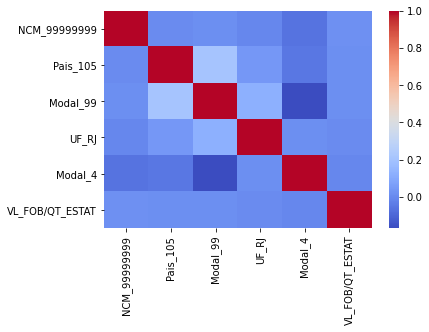

In [91]:
sns.heatmap(df2.corr(),cmap="coolwarm", annot=False )

# Dividindo o dataset em "base de teste" e "base de treinamento"

In [92]:
df2.columns

Index(['NCM_99999999', 'Pais_105', 'Modal_99', 'UF_RJ', 'Modal_4',
       'VL_FOB/QT_ESTAT'],
      dtype='object')

In [93]:
x = df2[['NCM_99999999', 'Pais_105', 'Modal_99', 'UF_RJ', 'Modal_4']]
y = df2['VL_FOB/QT_ESTAT']

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=16)

# Treinando o modelo LinearRegression

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lm = LinearRegression()

In [98]:
lm.fit(x_train,y_train)

LinearRegression()

In [99]:
# impressão do intercepto
print(lm.intercept_)

-361.4233619158167


In [100]:
# impressão dos coeficientes
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coeficiente'])
coeff_df

,Coeficiente
NCM_99999999,111011.460668
Pais_105,186445.305707
Modal_99,91998.626117
UF_RJ,29256.079014
Modal_4,-3347.537780


In [101]:
# realizando as predições
predicoesLR = lm.predict(x_test)

# Treinando o modelo Random Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [103]:
predicoesRFR = rfr.predict(x_test)

# Treinando o modelo Gradient Boosting Regressor

In [104]:
from sklearn.ensemble import GradientBoostingRegressor

In [105]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [106]:
predicoesGBR = gbr.predict(x_test)

# Avaliando os modelos

#### Mean squared error

In [107]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [108]:
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [109]:
RMSE_LR = rmse(y_test,predicoesLR)
RMSE_LR

465666.6121890339

In [110]:
RMSE_RFR = rmse(y_test,predicoesRFR)
RMSE_RFR

473479.5988917655

In [111]:
RMSE_GBR = rmse(y_test,predicoesGBR)
RMSE_GBR

473290.7904382735

#### Mean absolute error - MAE

In [112]:
from sklearn.metrics import mean_absolute_error

In [113]:
MAE_LR=mean_absolute_error(y_test, predicoesLR)
MAE_LR

20875.672438047106

In [114]:
MAE_RFR=mean_absolute_error(y_test, predicoesRFR)
MAE_RFR

16624.184796209334

In [115]:
MAE_GBR=mean_absolute_error(y_test, predicoesGBR)
MAE_GBR

16595.59731434855

#### Mean squared error - MSE

In [116]:
MSE_LR=mean_squared_error(y_test, predicoesLR)
MSE_LR

216845393707.6121

In [117]:
MSE_RFR=mean_squared_error(y_test, predicoesRFR)
MSE_RFR

224182930566.70715

In [118]:
MSE_GBR=mean_squared_error(y_test, predicoesGBR)
MSE_GBR

224004172313.68576

#### Coeficente de determinação - R²

In [119]:
from sklearn.metrics import r2_score

In [120]:
R2_LR=r2_score(y_test, predicoesLR)
R2_LR

0.001336337005287569

In [121]:
R2_RFR=r2_score(y_test, predicoesRFR)
R2_RFR

-0.03245608676619938

In [122]:
R2_GBR=r2_score(y_test, predicoesGBR)
R2_GBR

-0.03163283030360864